### Infrastructure

Why think about a neighborhood's infrastructure? Just ask U.S. Secretary of Transportation, Pete Buttigieg!

![Pete Buttigieg Infrastructure Explanation](https://media.giphy.com/media/IDakGqgM3hGnll4z35/giphy.gif)

From walkways, to roads, and everything under or in between, good infrastructure is key to the quality of life in any area. 

Would you really want to live in a neighborhood where you constantly dealt with things like this on the road every day?

![Hey Arnold Traffic Lights](https://media.giphy.com/media/l4EpeenC1Pa4r9VpC/giphy.gif)

![PGH Bus Sinkhole](https://media4.s-nbcnews.com/j/newscms/2019_44/3072871/191028-pittsburgh-bus-sinkhole-cs-237p_40629b85b427e44bd39ca9f98b74274d.fit-760w.jpg)

Yeah, I wouldn't either.

So, let's go through the city of Pittsburgh's 311 data from over the past six months and sort through the infrastructure related 311 requests to see which neighborhood has the least infrastructure issues and determine which one is the best!

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

#Get 311 data from downloaded file and read the data in CREATED_ON column as dates with Pandas datetime
pgh_311 = pd.read_csv("PGH-311-Data.csv", index_col="CREATED_ON", parse_dates=True)

#Narrow scope of data from October 1, 2020 to April 1, 2021
in_scope_311 = pgh_311.loc["2020-10-01 06:56:00":"2021-04-01 08:02:00"]

#Remove any incomplete request reports from dataframe
in_scope_311 = in_scope_311.dropna()

#Make a dataframe for all infrastructure related 311 requests (i.e. potholes, sinkholes, & etc), then sort by neighborhood
inf_query_mask = in_scope_311["REQUEST_TYPE"].str.contains("Pothole") | in_scope_311["REQUEST_TYPE"].str.contains("Sinkhole") | in_scope_311["REQUEST_TYPE"].str.contains("Landslide") | in_scope_311["REQUEST_TYPE"].str.contains("Water Main Break") | in_scope_311["REQUEST_TYPE"].str.contains("Leak") | in_scope_311["REQUEST_TYPE"].str.contains("Paving Concern/Problem") | in_scope_311["REQUEST_TYPE"].str.contains("Request New") | in_scope_311["REQUEST_TYPE"].str.contains("Replace/Repair ") | in_scope_311["REQUEST_TYPE"].str.contains("Street Light") | in_scope_311["REQUEST_TYPE"].str.contains("Asphalt") | in_scope_311["REQUEST_TYPE"].str.contains("Sewer") | in_scope_311["REQUEST_TYPE"].str.contains("Sewage") | in_scope_311["REQUEST_TYPE"].str.contains("Utility") | in_scope_311["REQUEST_TYPE"].str.contains("Need Cleared") | in_scope_311["REQUEST_TYPE"].str.contains("Obstruction") | in_scope_311["REQUEST_TYPE"].str.contains("Tree Fallen") | in_scope_311["REQUEST_TYPE"].str.contains("Bus Shelter") | in_scope_311["REQUEST_TYPE"].str.contains("Signal") | in_scope_311["REQUEST_TYPE"].str.contains("Guide Rail") 
infrastructure_311 = in_scope_311[inf_query_mask]
infra_requests = infrastructure_311.groupby("NEIGHBORHOOD").count()["REQUEST_TYPE"]

Before we get to which neighborhood is clearly winning infrastructure week, let's see what issues Pittsburgh had over our six month timeframe. Also, for the sake of consistency and preventing the entire dataset from becoming skewed at all, we will not be going over seasonal infrastructure requests such as Snow/Ice Removal. With that out of the way, I wonder what the most common infrastructure issue is going to be! (Knowing Pittsburgh, it's probably gonna be potholes.)

In [2]:
#Show how many times which infrastructure issue has been reported throughout Pittsburgh
infrastructure_311["REQUEST_TYPE"].value_counts()

Potholes                                  1228
Street Light - Repair                      685
Replace/Repair a Sign                      586
Utility Cut - Other                        224
Utility Cut - PWSA                         219
Request New Sign                           170
Leak                                       168
Sinkhole                                   165
Traffic or Pedestrian Signal, Repair       161
Water Main Break                           137
Drainage/Leak                               96
Street Obstruction/Closure                  65
Tree Fallen Across Road                     65
Utility Pole                                64
City Steps, Need Cleared                    50
Guide Rail                                  50
Sewers                                      49
Curb/Request for Asphalt Windrow            49
Tree Fallen Across Sidewalk                 43
Bus Shelter                                 34
Traffic or Pedestrian Signal, Request       34
Paving Concer

And it looks like potholes are the most common infrastructure issue in the city of Pittsburgh by a *mile*! 

Who ever could have guessed that one? /s

Well, now that we've seen just how many infrastructure 311 requests there have been, let's start finding out where they're all coming from throughout the city.

<AxesSubplot:>

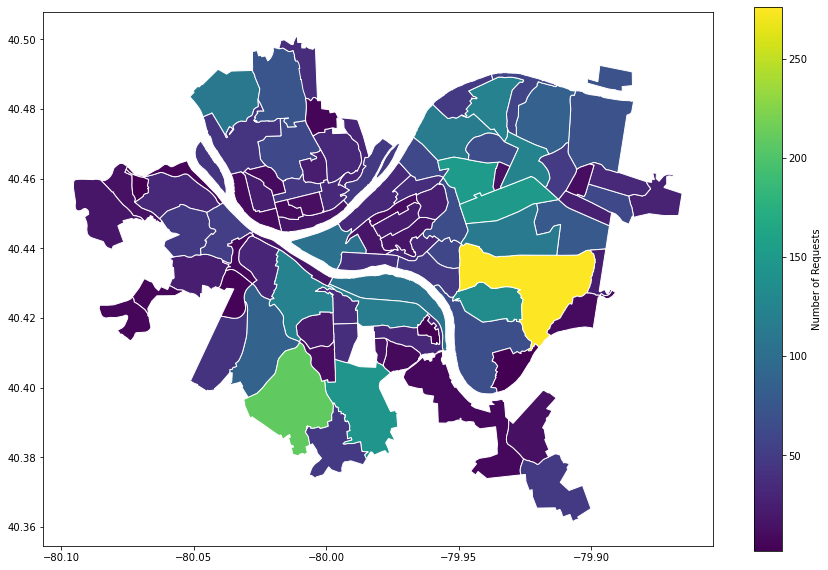

In [3]:
#Graph all neighborhood infrastructure requests to map of Pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
infra_requests_map = neighborhoods.merge(infra_requests, how="left", left_on="hood", right_on="NEIGHBORHOOD")
infra_requests_map.plot(column="REQUEST_TYPE", #Set the data to be used for coloring
                       edgecolor="white", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Number of Requests"}, #Label the legend
                       figsize=(15,10), #Set the size of the graph
                       )

Well, it looks like Squirrel Hill South definitely has the most infrastructure requests in the city, followed by Brookline. 

It's kind of difficult to tell which neighborhoods have the least requests on this map, though...

Let's make a list of the top 30 neighborhoods with the least infrastructure requests! That should make the best neighborhood in this aspect pretty apparent!

In [4]:
#Get the top 30 neighborhoods sorted in ascending order
print("**Top 30 Pgh. Neighborhoods in Infrastructure**")
print("Note: Higher list position is better.")
print()
infra_requests.sort_values(ascending=True)[:30]

**Top 30 Pgh. Neighborhoods in Infrastructure**
Note: Higher list position is better.



NEIGHBORHOOD
Arlington Heights        2
Glen Hazel               2
Chartiers City           3
Ridgemont                5
Northview Heights        6
Esplen                   6
East Carnegie            7
Oakwood                  7
West End                 8
Hays                     8
St. Clair                9
Allegheny West          10
Swisshelm Park          10
Chateau                 10
California-Kirkbride    10
Homewood West           11
Allegheny Center        12
Bon Air                 12
Bedford Dwellings       12
New Homestead           13
Friendship              14
Windgap                 14
Mt. Oliver              16
Crawford-Roberts        17
North Shore             17
Fairywood               17
Terrace Village         18
South Shore             18
Beltzhoover             22
Fineview                23
Name: REQUEST_TYPE, dtype: int64

And it looks like Arlington Heights and Glen Hazel are tied with two infrastructure requests over the past six months, thereby making them the best neighborhoods in the city of Pittsburgh regarding infrastructure!

Congrats to our two winners of Infrastructure Week! 

![Gatsby GIF](https://media.giphy.com/media/sp685iuIEGuys/giphy.gif)